### SharkAttack - Parte 3

# Valores Inconsistentes 

In [1]:
import pandas as pd
import numpy as np
import zipfile
import pylab as plt    
import seaborn as sns
import sys

ruta_archivo = r'C:\Users\lpgal\Desktop\Ironhack\Proyectos\Shark_Attack_Project\src'
sys.path.append(ruta_archivo)
from functions import *

pd.set_option('display.max_columns', None)  # me muestre todas las columnas

In [2]:
shark=pd.read_csv('../data/sharkattack_parte1.csv')

In [3]:
shark.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed22,unnamed23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,0,0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0,0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0,0


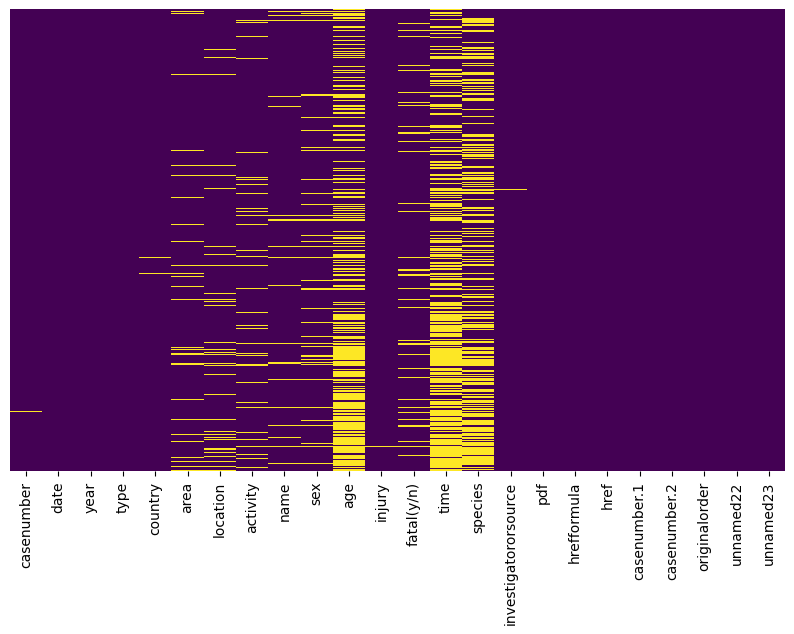

In [4]:
grafico(shark)

In [5]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   casenumber            6301 non-null   object 
 1   date                  6302 non-null   object 
 2   year                  6300 non-null   float64
 3   type                  6298 non-null   object 
 4   country               6252 non-null   object 
 5   area                  5847 non-null   object 
 6   location              5762 non-null   object 
 7   activity              5758 non-null   object 
 8   name                  6092 non-null   object 
 9   sex                   5737 non-null   object 
 10  age                   3471 non-null   object 
 11  injury                6274 non-null   object 
 12  fatal(y/n)            5763 non-null   object 
 13  time                  2948 non-null   object 
 14  species               3464 non-null   object 
 15  investigatororsource 

En este punto voy a ir columna por columna viendo a ver como limpiar los valores

In [6]:
shark['casenumber'].info

<bound method Series.info of 0       2018.06.25
1       2018.06.18
2       2018.06.09
3       2018.06.08
4       2018.06.04
           ...    
6297       ND.0005
6298       ND.0004
6299       ND.0003
6300       ND.0002
6301       ND.0001
Name: casenumber, Length: 6302, dtype: object>

In [7]:
shark['casenumber'].value_counts()

1983.06.15      2
1913.08.27.R    2
2009.12.18      2
2014.08.02      2
1920.00.00.b    2
               ..
1999.09.10      1
1999.09.16      1
1999.09.18      1
1999.09.24      1
ND.0001         1
Name: casenumber, Length: 6285, dtype: int64

La mayoría son fechas que están en formato Y/M/D y algunos tienen un .* a la derecha que no aporta nada.

En este caso como no deja de ser un elemento de identificación no voy a trabajar más en el de momento y lo voy a dejar con este formato.

---

La siguiente columna a analizar es la de fecha

In [8]:
shark['date'].info

<bound method Series.info of 0       25-Jun-2018
1       18-Jun-2018
2       09-Jun-2018
3       08-Jun-2018
4       04-Jun-2018
           ...     
6297    Before 1903
6298    Before 1903
6299      1900-1905
6300      1883-1889
6301      1845-1853
Name: date, Length: 6302, dtype: object>

In [9]:
shark['date'].value_counts()[:50]

1957                    11
1942                     9
1956                     8
1958                     7
1950                     7
1941                     7
1949                     6
No date                  6
Oct-1960                 5
12-Apr-2001              5
1970s                    5
28-Jul-1995              5
No date, Before 1963     5
1940                     5
05-Oct-2003              5
1959                     5
1954                     5
1955                     5
Aug-1956                 5
23-Jan-1970              4
Reported 10-Oct-1906     4
1960                     4
1960s                    4
Before 1958              4
1898                     4
1995                     4
27-Jul-1952              4
09-Jul-1994              4
1952                     4
28-Dec-2014              4
1961                     4
14-Jun-2012              4
27-Dec-2008              4
1904                     4
15-Apr-2018              4
20-Sep-2015              4
1876                     4
1

In [10]:
shark['date'].dtype

dtype('O')

In [11]:
tipo_datos(shark, 'date')

dict_keys([dtype('O')])

In [12]:
shark.loc[20,:]

casenumber                                                   2018.04.25.b
date                                                          25-Apr-2018
year                                                               2018.0
type                                                         Questionable
country                                                         AUSTRALIA
area                                                      New South Wales
location                                                      Lennox Head
activity                                                          Surfing
name                                                          Matthew Lee
sex                                                                     M
age                                                                   NaN
injury                                                          No injury
fatal(y/n)                                                              N
time                                  

In [13]:
shark.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed22,unnamed23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,0,0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0,0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0,0


como la fecha coincide con la de casenumber la voy a obtener mediante esa columna

La mayoría son fechas que están en formato Y/M/D y algunos tienen un .* a la derecha que no aporta nada.

En este caso voy a eliminar el punto y lo que esté a su derecha.

Después, como está en formato str voy a pasar a formato fecha

In [14]:
shark[['year', 'month', 'day', 'extra']] = shark['casenumber'].str.split('.', n=3, expand=True)

In [15]:
shark.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed22,unnamed23,month,day,extra
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,0,0,06,25,None
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,0,0,06,18,None
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,0,0,06,09,None
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,0,0,06,08,None
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,0,0,06,04,None


In [16]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   casenumber            6301 non-null   object 
 1   date                  6302 non-null   object 
 2   year                  6301 non-null   object 
 3   type                  6298 non-null   object 
 4   country               6252 non-null   object 
 5   area                  5847 non-null   object 
 6   location              5762 non-null   object 
 7   activity              5758 non-null   object 
 8   name                  6092 non-null   object 
 9   sex                   5737 non-null   object 
 10  age                   3471 non-null   object 
 11  injury                6274 non-null   object 
 12  fatal(y/n)            5763 non-null   object 
 13  time                  2948 non-null   object 
 14  species               3464 non-null   object 
 15  investigatororsource 

In [17]:
shark['extra'].value_counts()

a          644
b          633
R          524
c          134
d           51
e           27
f           16
            12
a.R          9
g            9
h            8
b.R          7
i            5
j            5
k            3
e.R          2
R.a          2
R2           2
R.           2
a.           2
R.b          2
R4           1
R.a & b      1
c.R          1
d.R          1
a..R         1
b..R         1
c.           1
b.           1
R            1
.R           1
.b           1
l            1
m            1
.a           1
a & b        1
x            1
R1           1
R3           1
Name: extra, dtype: int64

Esta columna se puede eliminar

In [18]:
shark.drop('extra', axis=1, inplace=True)

In [19]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   casenumber            6301 non-null   object 
 1   date                  6302 non-null   object 
 2   year                  6301 non-null   object 
 3   type                  6298 non-null   object 
 4   country               6252 non-null   object 
 5   area                  5847 non-null   object 
 6   location              5762 non-null   object 
 7   activity              5758 non-null   object 
 8   name                  6092 non-null   object 
 9   sex                   5737 non-null   object 
 10  age                   3471 non-null   object 
 11  injury                6274 non-null   object 
 12  fatal(y/n)            5763 non-null   object 
 13  time                  2948 non-null   object 
 14  species               3464 non-null   object 
 15  investigatororsource 

Las columnas dia, mes y año están en object y necesito que estén en int

In [20]:
shark['year'] = shark['year'].astype(int)

ValueError: invalid literal for int() with base 10: '1962,08'

Primero tengo que eliminar todo lo que haya despues de las comas para que me los reconozca como valores int

In [21]:
shark['year'] = shark['year'].str.split(',', n=1).str[0]

In [22]:
shark['year'] = shark['year'].astype(int)

ValueError: cannot convert float NaN to integer

In [23]:
shark.year.isna().sum()

1

In [24]:
shark.loc[shark['year'].isna(), 'year']

5488    NaN
Name: year, dtype: object

In [25]:
shark.loc[5488,:] 

casenumber                                                            NaN
date                                                 Reported 06-Sep-1905
year                                                                  NaN
type                                                             Provoked
country                                                               USA
area                                                              Florida
location                                     Fort Pierce, St Lucie County
activity                                                          Fishing
name                                                          David Curry
sex                                                                     M
age                                                                   NaN
injury                  Lacerations to leg from hooked shark PROVOKED ...
fatal(y/n)                                                              N
time                                  

como solo es un valor lo introduzco manualmente

In [26]:
shark.loc[5488,'casenumber'] = '1905.09.06' 

In [27]:
shark.loc[5488,:] 

casenumber                                                     1905.09.06
date                                                 Reported 06-Sep-1905
year                                                                  NaN
type                                                             Provoked
country                                                               USA
area                                                              Florida
location                                     Fort Pierce, St Lucie County
activity                                                          Fishing
name                                                          David Curry
sex                                                                     M
age                                                                   NaN
injury                  Lacerations to leg from hooked shark PROVOKED ...
fatal(y/n)                                                              N
time                                  

In [28]:
shark.loc[5488, ['year', 'month', 'day']] = ['1905', '09', '06']

In [29]:
shark.loc[5488,:] 

casenumber                                                     1905.09.06
date                                                 Reported 06-Sep-1905
year                                                                 1905
type                                                             Provoked
country                                                               USA
area                                                              Florida
location                                     Fort Pierce, St Lucie County
activity                                                          Fishing
name                                                          David Curry
sex                                                                     M
age                                                                   NaN
injury                  Lacerations to leg from hooked shark PROVOKED ...
fatal(y/n)                                                              N
time                                  

In [30]:
shark['year'] = shark['year'].astype(int)

ValueError: invalid literal for int() with base 10: 'ND-0154'

Como hay varios ND-X voy a coger todos los valores que tengan ND y ponerles por fecha un proxy que sea -1

Para ello voy a definir una función que me lo haga para todas las columnas cuando sea necesario

In [31]:
limpiar_fecha(shark, 'year', 'ND')

In [41]:
shark['year'] = shark['year'].astype(int)

In [33]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   casenumber            6302 non-null   object 
 1   date                  6302 non-null   object 
 2   year                  6302 non-null   int32  
 3   type                  6298 non-null   object 
 4   country               6252 non-null   object 
 5   area                  5847 non-null   object 
 6   location              5762 non-null   object 
 7   activity              5758 non-null   object 
 8   name                  6092 non-null   object 
 9   sex                   5737 non-null   object 
 10  age                   3471 non-null   object 
 11  injury                6274 non-null   object 
 12  fatal(y/n)            5763 non-null   object 
 13  time                  2948 non-null   object 
 14  species               3464 non-null   object 
 15  investigatororsource 

In [40]:
tipo_datos(shark, 'month')

dict_keys([dtype('O')])

In [38]:
shark['month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6302 entries, 0 to 6301
Series name: month
Non-Null Count  Dtype 
--------------  ----- 
6270 non-null   object
dtypes: object(1)
memory usage: 49.4+ KB
